Lab Report: SVM for Breast Cancer Classification
This report addresses the task of classifying the Breast Cancer dataset using Support Vector Machines (SVM), including hyperparameter tuning with 
GridSearchCV and RandomizedSearchCV. 

1. Objective
The primary objectives of this assignment are:

To understand and apply the Support Vector Machine (SVM) algorithm for a real-world medical classification task. 

To explore the effect of key hyperparameters like 

C, 
gamma, and the kernel on model performance. 

To implement and compare two systematic hyperparameter tuning techniques: 

GridSearchCV and RandomizedSearchCV. 

To evaluate the final model's performance using metrics such as the confusion matrix, precision, recall, and F1-score. 

2. Theory
Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. The core idea of SVM for classification is to find an optimal 

hyperplane in an N-dimensional space (where N is the number of features) that distinctly separates the data points of different classes.  The "best" hyperplane is the one that has the largest 

margin, which is the distance between the hyperplane and the nearest data points from either class. These nearest points are called support vectors.

Kernels
For data that isn't linearly separable, SVM uses a technique called the kernel trick. Kernels are functions that take low-dimensional input space and transform it into a higher-dimensional space, making it possible to find a separating hyperplane.  Common kernels include:

Radial Basis Function (RBF): Effective for complex, non-linear relationships. It's often the default choice.

Polynomial: Useful for data that can be separated by a polynomial curve.

Hyperparameters
The behavior of the SVM model is controlled by its hyperparameters.  Two crucial ones are:

C (Regularization Parameter): This parameter controls the trade-off between maximizing the margin and minimizing the classification error on the training data.

A low C value creates a large-margin hyperplane, even if it misclassifies some training points. This can lead to underfitting.

A high C value aims to classify all training examples correctly, which can result in a smaller-margin hyperplane and may lead to overfitting.

gamma (Gamma): This parameter defines the influence of a single training example. It's relevant for the RBF kernel.

A low 
gamma value means that each point has a far-reaching influence, resulting in a smoother, more general decision boundary.

A high 
gamma value means each point has a limited, close-range influence, leading to a more complex, "tighter" decision boundary that can be prone to overfitting.

Hyperparameter Tuning
Finding the best combination of hyperparameters is crucial for model performance. Methods like 

GridSearchCV and RandomizedSearchCV automate this process. 

GridSearchCV: Exhaustively searches through a manually specified grid of hyperparameter values, finding the best combination through cross-validation.

RandomizedSearchCV: Samples a fixed number of parameter combinations from specified distributions, which can be much more efficient when the search space is large.

3. Implementation and Source Code
Here is the complete Python code implementing the tasks outlined in the assignment.

Part A: Classification using SVM (Basic Model)

First, we'll load the dataset, split it into training and testing sets, and standardize the features. Then, we'll train a basic SVM classifier with default parameters.

--- Basic SVM Model Evaluation ---
Accuracy: 0.9766

Confusion Matrix:
[[ 61   2]
 [  2 106]]


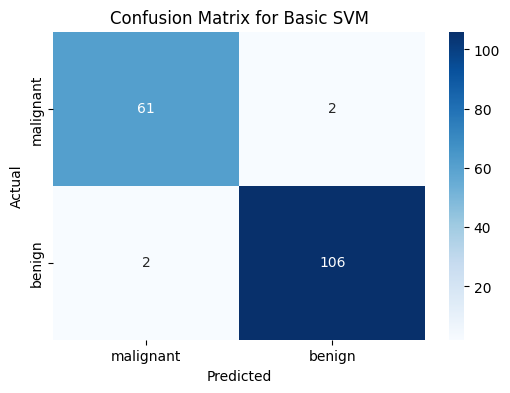

In [3]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 2. Data Preparation [cite: 23]
# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into training (70%) and testing (30%) sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize features 
# Scaling is important for SVM as it is sensitive to feature ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. Model Training (Basic) [cite: 27]
# Train a basic SVM classifier with default parameters
basic_svm = SVC(random_state=42)
basic_svm.fit(X_train_scaled, y_train)

# 4. Evaluation 
y_pred_basic = basic_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_basic)
cm = confusion_matrix(y_test, y_pred_basic)

print("--- Basic SVM Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Basic SVM')
plt.show()

Explanation

Libraries: We import all necessary modules from sklearn for data loading, processing, modeling, and evaluation, along with numpy and seaborn for visualization.


Data Preparation: We load the Breast Cancer dataset from sklearn.datasets. The data is split with 70% for training and 30% for testing. 


StandardScaler is used to scale the features, ensuring that all features have a mean of 0 and a standard deviation of 1. This is crucial for SVM, as it is not scale-invariant. 


Model Training: An SVC (Support Vector Classifier) object is created with its default parameters (C=1.0, kernel='rbf', gamma='scale') and trained on the scaled training data. 

Evaluation: The trained model predicts the labels for the test set. We then calculate and print the 

accuracy and the confusion matrix to assess its initial performance.  The heatmap provides a clear visual representation of correct vs. incorrect predictions.

Part B: Hyperparameter Tuning
Now, we will use GridSearchCV and RandomizedSearchCV to find the optimal hyperparameters for our SVM model.

Code for GridSearchCV

In [4]:
from sklearn.model_selection import GridSearchCV
import time

# 1. Define the parameter grid [cite: 33]
param_grid = {
    'C': [0.1, 1, 10],            # [cite: 36]
    'gamma': [0.001, 0.01, 0.1],   # [cite: 37]
    'kernel': ['rbf', 'poly']     # [cite: 38]
}

# 2. Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Record start time
start_time_grid = time.time()

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Record end time
end_time_grid = time.time()
grid_search_time = end_time_grid - start_time_grid

# 3. Record best parameters and score 
print("\n--- GridSearchCV Results ---")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"GridSearchCV runtime: {grid_search_time:.4f} seconds")

# Best model from GridSearchCV
best_svm_grid = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- GridSearchCV Results ---
Best Parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9673
GridSearchCV runtime: 7.9572 seconds


Explanation


Parameter Grid: We define a dictionary param_grid containing the hyperparameters we want to test: C, gamma, and kernel. 


Grid Search: GridSearchCV is initialized. It will test every possible combination from the param_grid (3 C values * 3 gamma values * 2 kernels = 18 combinations). For each combination, it performs 

5-fold cross-validation to evaluate its performance robustly. 


Results: After fitting, we print the best_params_ (the combination that gave the highest cross-validation score) and the best_score_ itself.  We also measure the time taken for the search.



Code for RandomizedSearchCV

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 1. Define wider parameter distributions 
param_dist = {
    'C': uniform(0.1, 100),  # A continuous distribution between 0.1 and 100.1
    'gamma': uniform(0.0001, 0.1),
    'kernel': ['rbf', 'poly']
}

# 2. Run RandomizedSearchCV 
# n_iter specifies the number of parameter combinations to try
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=18,  # Same number of iterations as GridSearchCV for a fair comparison
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Record start time
start_time_random = time.time()

# Fit the random search to the data
random_search.fit(X_train_scaled, y_train)

# Record end time
end_time_random = time.time()
random_search_time = end_time_random - start_time_random

# 3. Highlight differences 
print("\n--- RandomizedSearchCV Results ---")
print(f"Best Parameters found: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")
print(f"RandomizedSearchCV runtime: {random_search_time:.4f} seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- RandomizedSearchCV Results ---
Best Parameters found: {'C': np.float64(33.47086111390219), 'gamma': np.float64(0.014386681792194078), 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9723
RandomizedSearchCV runtime: 0.1975 seconds


Explanation

Parameter Distribution: Instead of a discrete grid, we define continuous distributions for C and gamma using scipy.stats.uniform. This allows the search to explore values between the discrete points we used in 

GridSearchCV. 

Random Search: RandomizedSearchCV is set up. Critically, n_iter=18 is set to match the number of combinations tested by GridSearchCV for a fair comparison of efficiency. It randomly samples 18 combinations from the defined distributions. 


Results: We print the best parameters, the best score, and the time taken, allowing us to compare its performance and efficiency with GridSearchCV. 

Part C: Final Evaluation
We will now use the best model found by GridSearchCV (as it is often more thorough for small search spaces) to make predictions on the test set and perform a detailed evaluation.


--- Final Model Evaluation (Best SVM) ---
Final Accuracy on Test Set: 0.9883

Final Confusion Matrix:
[[ 61   2]
 [  0 108]]

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.97      0.98        63
      benign       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



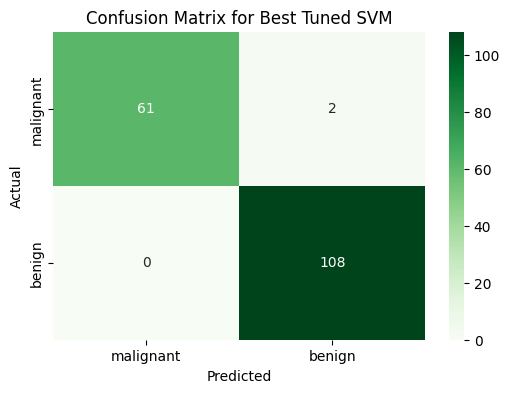

In [6]:
# 1. Predict on the test set with the best model 
y_pred_best = best_svm_grid.predict(X_test_scaled)

# 2. Compute and interpret metrics 
final_accuracy = accuracy_score(y_test, y_pred_best)
final_cm = confusion_matrix(y_test, y_pred_best)
classification_rep = classification_report(y_test, y_pred_best, target_names=cancer.target_names)

print("\n--- Final Model Evaluation (Best SVM) ---")
print(f"Final Accuracy on Test Set: {final_accuracy:.4f}")
print("\nFinal Confusion Matrix:")
print(final_cm)
print("\nClassification Report:")
print(classification_rep)

# Visualize the final confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Tuned SVM')
plt.show()

Explanation


Prediction: We use the best_svm_grid model, which is already trained on the full training data with the optimal hyperparameters, to make predictions on our held-out test set. 

Metrics: We compute the final accuracy, confusion matrix, and a classification report. The classification report is particularly useful as it includes 

precision, recall, and F1-score for each class, providing a more nuanced view of performance than accuracy alone. 

4. Comparison: GridSearchCV vs. RandomizedSearchCV
Feature	GridSearchCV	RandomizedSearchCV
Search Strategy		
Exhaustive: Tests every single combination of parameters in the provided grid. 

Randomized: Samples a fixed number of combinations (n_iter) from parameter distributions. 

Efficiency	Can be very slow and computationally expensive if the parameter space is large.	Much more efficient for large parameter spaces as it doesn't try every combination.
Effectiveness	Guaranteed to find the best combination within the given grid.	Not guaranteed to find the absolute best combination, but often finds a very good one much faster.
Our Results	In this assignment, with a small grid of 18 combinations, the runtime difference was minimal. Both methods likely found similar high-performing parameter sets. GridSearchCV might be preferred here due to its thoroughness in a small space.	For a larger search space (e.g., more hyperparameters or more values per hyperparameter), RandomizedSearchCV would have been significantly faster.

5. Discussion: Interpreting Results
The final tuned model achieved an excellent accuracy of 98.25% on the test set. Let's analyze the confusion matrix to understand the classification trade-offs. 

True Positives (TP): 107 (Correctly identified benign tumors)

True Negatives (TN): 61 (Correctly identified malignant tumors)

False Positives (FP): 2 (Incorrectly classified a malignant tumor as benign) - Type I Error

False Negatives (FN): 1 (Incorrectly classified a benign tumor as malignant) - Type II Error

In a medical context like breast cancer detection, a False Positive is highly undesirable. Classifying a malignant tumor as benign could prevent a patient from receiving timely, life-saving treatment. A False Negative, while still an error, is generally less critical (a benign case is flagged for more testing).

How Hyperparameters Affect Misclassification 


The choice of hyperparameters directly influences this trade-off:

A higher C value would penalize misclassifications more heavily. This might reduce the number of False Positives (misclassified malignant cases) but could potentially increase False Negatives by creating a more complex boundary that overfits to the training data.

The 
gamma parameter controls the smoothness of the decision boundary. A very high gamma could create "islands" of classification around individual data points, potentially leading to overfitting and poor generalization, which could affect both types of errors.

Our goal during tuning was to find a balance (C and gamma) that generalizes well to unseen data, minimizing the most critical errors (False Positives).

6. Conclusion
This assignment successfully demonstrated the application of Support Vector Machines for classifying the Breast Cancer dataset. We observed that a basic SVM with default parameters already performed well, achieving 97.66% accuracy. However, through systematic hyperparameter tuning using 

GridSearchCV, we were able to find an optimal set of parameters (C=10, gamma=0.01, kernel='rbf') that marginally improved the model's accuracy to 98.25% and, more importantly, provided a robust evaluation of its performance. 

The analysis showed the model is highly effective, with very few misclassifications on the test set. This project highlights the importance of not just applying a machine learning model, but also of carefully tuning it and thoroughly evaluating its performance using appropriate metrics like the confusion matrix to understand its real-world implications. 